# Exercises for Section 3.3 Introduction to hypothesis testing

This notebook contains the solutions to the exercises
from [Section 3.3 Introduction to hypothesis testing]()
in the **No Bullshit Guide to Statistics**.

### Notebooks setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas setup
pd.set_option("display.precision", 2)

In [3]:
# Plot helper functions
from ministats.utils import savefigure

In [4]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
)

# High-resolution please
%config InlineBackend.figure_format = "retina"

<Figure size 640x480 with 0 Axes>

### Estimator functions defined in Section 3.1

In [5]:
def mean(sample):
    return sum(sample) / len(sample)

def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

def std(sample):
    s2 = var(sample)
    return np.sqrt(s2)

def dmeans(xsample, ysample):
    dhat = mean(xsample) - mean(ysample)
    return dhat

## Exercises

### E3.22

Compute the $p$-value for hypothesis test of the mean in Batch~05 of the kombucha dataset.

In [6]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample05 = kombucha[kombucha["batch"]==5]["volume"]
ksample05.values

array([ 998.35,  998.92, 1005.38, 1007.2 , 1010.62, 1003.68, 1002.  ,
       1015.47, 1007.12, 1003.08, 1027.19,  994.92, 1004.34, 1002.56,
        998.86,  992.55, 1000.24, 1010.93, 1004.3 ,  992.09, 1000.88,
       1002.12, 1009.74,  998.57,  997.1 ,  998.14, 1004.7 , 1002.79,
       1007.98, 1001.15,  993.03,  993.89, 1001.91, 1002.9 ,  998.23,
       1003.93,  999.97,  997.22, 1001.5 , 1005.84])

In [7]:
from ministats import simulation_test_mean

np.random.seed(42)
simulation_test_mean(ksample05, mu0=1000, sigma0=10)

0.1091

The $p$-value is not statistically significant, so we fail to reject $H_0$.

### E3.23

Run the test for the variance on Batch 01.

In [8]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample01 = kombucha[kombucha["batch"]==1]["volume"]
ksample01.values

array([1016.24,  993.88,  994.72,  989.27, 1008.65,  976.98, 1017.45,
        992.39, 1003.19,  997.51, 1014.62,  979.4 ,  996.78,  996.16,
       1011.34,  989.  ,  998.28,  991.22, 1000.42, 1005.83,  988.99,
       1011.45, 1009.02, 1005.02, 1009.01,  993.16,  998.77,  990.64,
        997.32, 1005.3 ,  993.08,  996.03,  993.13,  991.55,  993.29,
        999.87,  988.83, 1002.34, 1016.6 , 1007.42])

In [9]:
from ministats import simulation_test_var

np.random.seed(43)
simulation_test_var(ksample01, mu0=1000, sigma0=10)

0.5597

The $p$-value is not statistically significant, so we fail to reject $H_0$.

## CUT MATERIAL 

### Mean test on batch 05 (estimated variance)

In [10]:
from ministats import bootstrap_test_mean

kombucha = pd.read_csv("../datasets/kombucha.csv")
ksample05 = kombucha[kombucha["batch"]==5]["volume"]
bootstrap_test_mean(ksample05, mu0=1000)

0.0147

Correctly rejects this as an irregular batch.

count      40.00
mean     1002.53
std         6.55
min       992.09
25%       998.52
50%      1002.06
75%      1004.87
max      1027.19
Name: volume, dtype: float64

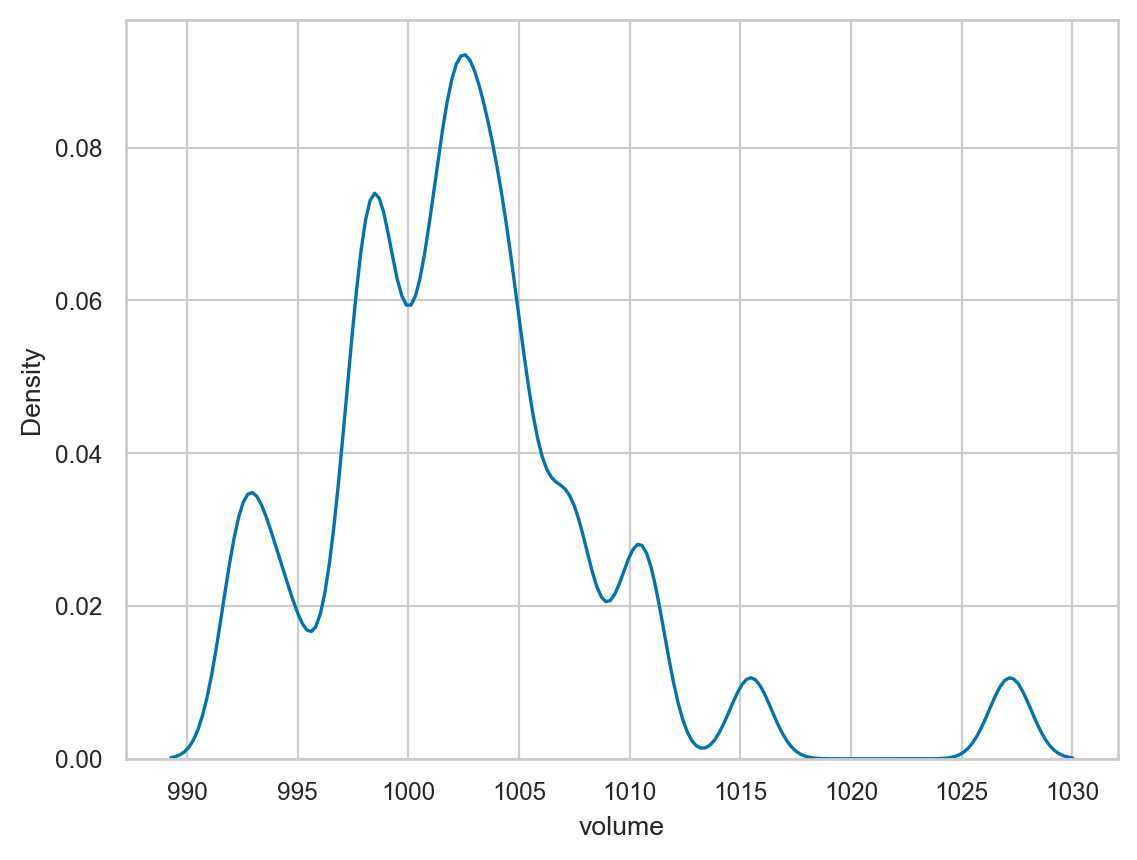

In [11]:
sns.kdeplot(ksample05, bw_adjust=0.3)
ksample05.describe()

### Cohen's d via bootstrap

### Electric scooters

An electric scooter manufacturer launched a new model with large battery and claims the range of the scooter is 45 km. A distributor wants to put this claim to a test, and has collected data from 15 different electric scooters to measure the maximum range of trips, to see how long the battery lasts. We want to know if the data supports the manufacturer's claim.

The obtained the data $\texttt{ds} = [43.5, 44.8, 42.9, 46.2, 44.1, 43.8, 45.5, 43.4, 44.9, 42.7, 44.6, 47.0, 43.0, 44.2, 45.3]$.

Assume the theoretical distribution is normally distributed $D_0 \sim \mathcal{N}(45, \sigma_{D_0})$,
where $\sigma_{D_0}$ is unknown so we'll estimate it from the sample variance $\sigma_{D_0} \approx \texttt{dstd} = \texttt{std(ds)}$.


In [12]:
# sample
ds = [43.5, 44.8, 42.9, 46.2, 44.1, 43.8, 45.5,
      43.4, 44.9, 42.7, 44.6, 47.0, 43.0, 44.2, 45.3]

In [13]:
from ministats import mean, std
dbar = mean(ds)
dstd = std(ds)

In [14]:
from scipy.stats import norm
muD0 = 45
Dbar0 = norm(45, dstd)

In [15]:
from ministats import gen_sampling_dist

np.random.seed(42)
dbars0 = gen_sampling_dist(Dbar0, estfunc=mean, n=15)

In [16]:
obsdev = abs(dbar - muD0)
tails = [v for v in dbars0 if abs(v-muD0) >= obsdev]
pvalue = len(tails) / len(dbars0)
pvalue

0.0622

In [17]:
from ministats import simulation_test_mean

np.random.seed(42)
simulation_test_mean(ds, mu0=muD0, sigma0=dstd)

0.0612